# Road Library

In [411]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load Dataset

In [412]:
train_df = pd.read_csv('train.csv')

print(train_df.shape)
train_df.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [413]:
test_df = pd.read_csv('test.csv')

print(test_df.shape)
test_df.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


# EDA

## Dates

In [414]:
train_df['Dates'] = pd.to_datetime(train_df['Dates'])

train_df['Dates'].dtypes

dtype('<M8[ns]')

In [415]:
test_df['Dates'] = pd.to_datetime(test_df['Dates'])

test_df['Dates'].dtypes

dtype('<M8[ns]')

In [416]:
train_df['Dates_year'] = train_df['Dates'].dt.year
train_df['Dates_month'] = train_df['Dates'].dt.month
train_df['Dates_day'] = train_df['Dates'].dt.day
train_df['Dates_hour'] = train_df['Dates'].dt.hour
train_df['Dates_minute'] = train_df['Dates'].dt.minute
train_df['Dates_second'] = train_df['Dates'].dt.second

train_df[['Dates','Dates_year', 'Dates_month', 'Dates_day', 'Dates_hour', 'Dates_minute', 'Dates_second']].head()

,Dates,Dates_year,Dates_month,Dates_day,Dates_hour,Dates_minute,Dates_second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [417]:
test_df['Dates_year'] = test_df['Dates'].dt.year
test_df['Dates_month'] = test_df['Dates'].dt.month
test_df['Dates_day'] = test_df['Dates'].dt.day
test_df['Dates_hour'] = test_df['Dates'].dt.hour
test_df['Dates_minute'] = test_df['Dates'].dt.minute
test_df['Dates_second'] = test_df['Dates'].dt.second

test_df[['Dates','Dates_year', 'Dates_month', 'Dates_day', 'Dates_hour', 'Dates_minute', 'Dates_second']].head()

,Dates,Dates_year,Dates_month,Dates_day,Dates_hour,Dates_minute,Dates_second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


In [418]:
Dates_list = ['Dates_year', 'Dates_month', 'Dates_day', 'Dates_hour', 'Dates_minute', 'Dates_second']

Dates_list

['Dates_year',
 'Dates_month',
 'Dates_day',
 'Dates_hour',
 'Dates_minute',
 'Dates_second']

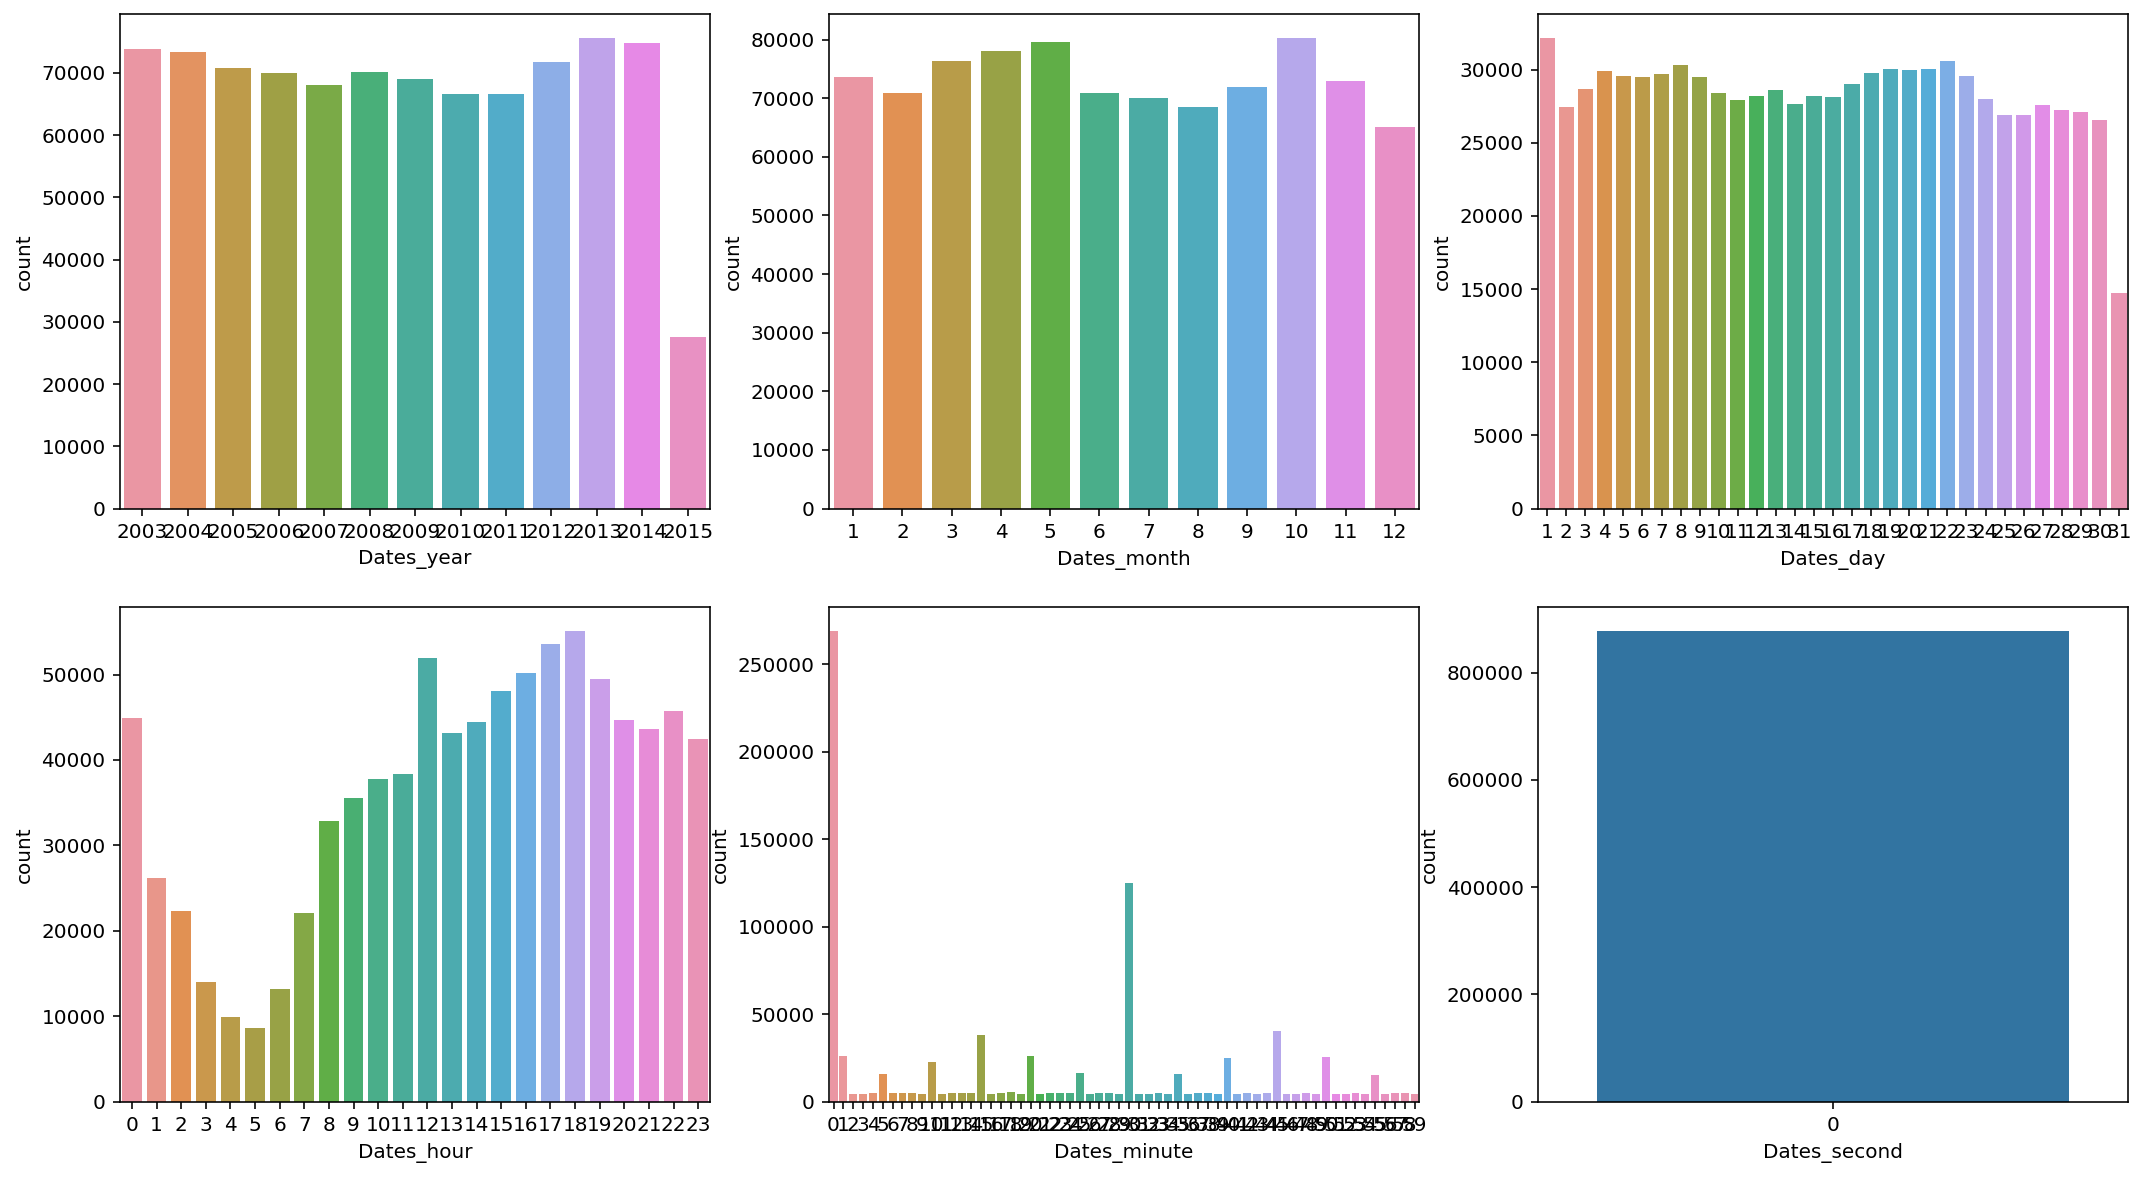

In [419]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) =  plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,10)

sns.countplot(data=train_df, x='Dates_year', ax=ax1)
sns.countplot(data=train_df, x='Dates_month', ax=ax2)
sns.countplot(data=train_df, x='Dates_day', ax=ax3)
sns.countplot(data=train_df, x='Dates_hour', ax=ax4)
sns.countplot(data=train_df, x='Dates_minute', ax=ax5)
sns.countplot(data=train_df, x='Dates_second', ax=ax6)

In [420]:
def clean_minute(minute):
    
    if (minute > 0) & (minute < 30):
        minute = 15
        return minute
        
    elif (minute > 30) & (minute < 60):
        minute = 45
        return minute
    
    else:
        minute = minute
        return minute
    
train_df['minute(clean)'] = train_df['Dates_minute'].apply(clean_minute)    

train_df[['Dates_minute','minute(clean)']].head()

,Dates_minute,minute(clean)
0,53,45
1,53,45
2,33,45
3,30,30
4,30,30


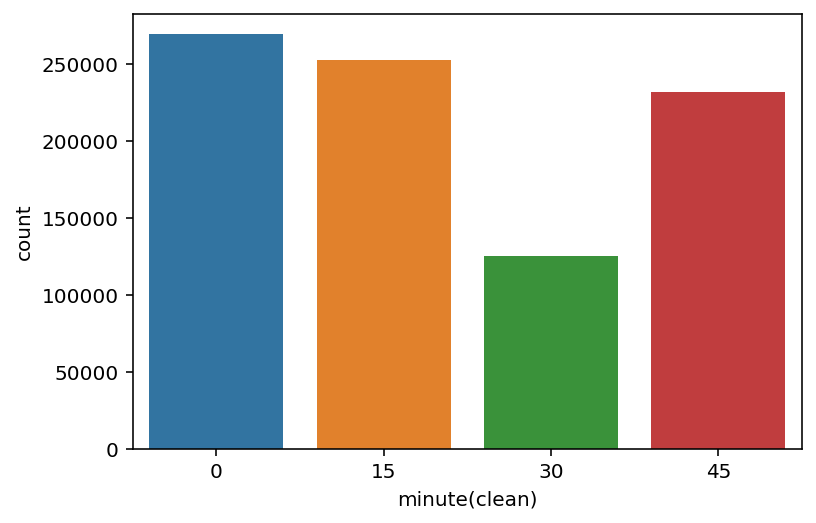

In [421]:
sns.countplot(data=train_df, x='minute(clean)')

In [422]:
test_df['minute(clean)'] = test_df['Dates_minute'].apply(clean_minute)    

test_df[['Dates_minute','minute(clean)']].head()

,Dates_minute,minute(clean)
0,59,45
1,51,45
2,50,45
3,45,45
4,45,45


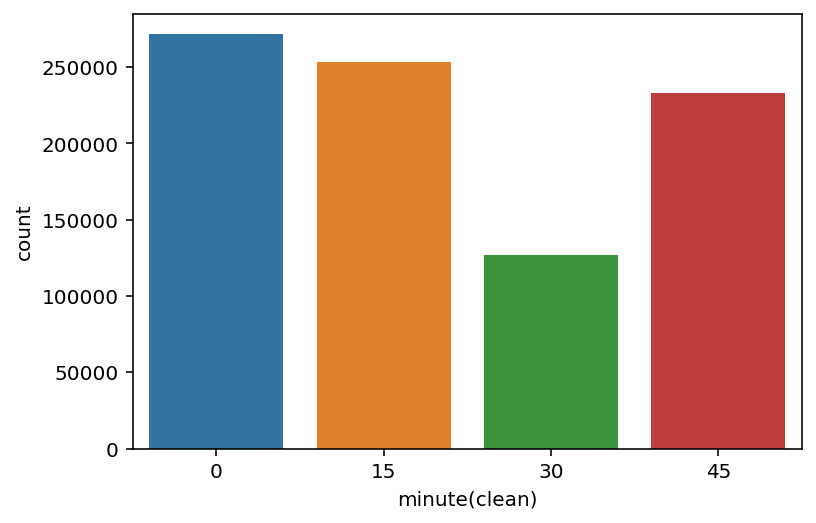

In [423]:
sns.countplot(data=test_df, x='minute(clean)')

## Address

In [424]:
def clean_address(address):
    
    if '/' not in address:
        return address
    
    address1, address2 = address.split('/')
    
    address1, address2 = address1.strip(), address2.strip()
    
    if address1 < address2:
        address = '{} / {}'.format(address1, address2)
    else:
        address = '{} / {}'.format(address2, address1)
    
    return address

train_df['Address(clean)'] = train_df['Address'].apply(clean_address)

print(len(train_df['Address(clean)'].unique()))
train_df[['Address', 'Address(clean)']].head()

17812


,Address,Address(clean)
0,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
1,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
2,VANNESS AV / GREENWICH ST,GREENWICH ST / VANNESS AV
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,100 Block of BRODERICK ST


In [425]:
def clean_address(address):
    
    if '/' not in address:
        return address
    
    address1, address2 = address.split('/')
    
    address1, address2 = address1.strip(), address2.strip()
    
    if address1 < address2:
        address = '{} / {}'.format(address1, address2)
    else:
        address = '{} / {}'.format(address2, address1)
    
    return address

test_df['Address(clean)'] = test_df['Address'].apply(clean_address)

print(len(test_df['Address(clean)'].unique()))
test_df[['Address', 'Address(clean)']].head()

17772


,Address,Address(clean)
0,2000 Block of THOMAS AV,2000 Block of THOMAS AV
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,2000 Block of GOUGH ST
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [426]:
def findname(data):
    
    if '/' in data:
        return 'Crossroad'
    
    elif 'ST' in data.split(' ')[-1]:
        return 'ST'
    
    elif 'AV' in data.split(' ')[-1]:
        return 'AV'
    
    else:
        return 'Others'
    
train_df['division_address'] = train_df['Address(clean)'].apply(findname)

train_df[['Address(clean)','division_address']].head()

,Address(clean),division_address
0,LAGUNA ST / OAK ST,Crossroad
1,LAGUNA ST / OAK ST,Crossroad
2,GREENWICH ST / VANNESS AV,Crossroad
3,1500 Block of LOMBARD ST,ST
4,100 Block of BRODERICK ST,ST


In [427]:
def findname(data):
    
    if '/' in data:
        return 'Crossroad'
    
    elif 'ST' in data.split(' ')[-1]:
        return 'ST'
    
    elif 'AV' in data.split(' ')[-1]:
        return 'AV'
    
    else:
        return 'Others'
    
test_df['division_address'] = test_df['Address(clean)'].apply(findname)

test_df[['Address(clean)','division_address']].head()

,Address(clean),division_address
0,2000 Block of THOMAS AV,AV
1,3RD ST / REVERE AV,Crossroad
2,2000 Block of GOUGH ST,ST
3,4700 Block of MISSION ST,ST
4,4700 Block of MISSION ST,ST


In [428]:
train_df_address = train_df['Address(clean)'].value_counts()

top_address = train_df_address[train_df_address >= 100]

top_address_count = top_address.index

top_address_count

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       '400 Block of SPEAR ST', 'HOWARD ST / THE EMBARCADEROSOUTH ST',
       '300 Block of BUCHANAN ST', '2100 Block of FULTON ST',
       '500 Block of JACKSON ST', '400 Block of PARNASSUS AV',
       '0 Block of LAGUNA ST', 'BEALE ST / BRYANT ST',
       '1200 Block of INGALLS ST', '900 Block of POLK ST'],
      dtype='object', length=1719)

In [429]:
division_list = train_df['division_address'].unique().tolist()

division_list[:5]

['Crossroad', 'ST', 'AV', 'Others']

In [430]:
train_df.loc[~train_df['Address(clean)'].isin(top_address_count), 'Address(clean)'] = 'under100'

train_df[['Address','Address(clean)']].head()

,Address,Address(clean)
0,OAK ST / LAGUNA ST,under100
1,OAK ST / LAGUNA ST,under100
2,VANNESS AV / GREENWICH ST,under100
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,under100


In [431]:
test_df.loc[~test_df['Address(clean)'].isin(top_address_count), 'Address(clean)'] = 'under100'

test_df[['Address','Address(clean)']].head()

,Address,Address(clean)
0,2000 Block of THOMAS AV,under100
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,under100
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [432]:
len(train_df['Address(clean)'].unique()), len(test_df['Address(clean)'].unique())

(1720, 1720)

In [433]:
train_df_address = pd.get_dummies(train_df['Address(clean)'])

train_df_address

,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST,under100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
878045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
878046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [434]:
test_df_address = pd.get_dummies(test_df['Address(clean)'])

test_df_address

,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST,under100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
884258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
884259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [435]:
train_df_division = pd.get_dummies(train_df['division_address'])

train_df_division

,AV,Crossroad,Others,ST
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
878044,0,1,0,0
878045,0,0,0,1
878046,0,1,0,0
878047,0,1,0,0


In [436]:
train_df = pd.concat([train_df, train_df_division], axis=1)

print(train_df.shape)
train_df.head()

(878049, 22)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates_year,...,Dates_hour,Dates_minute,Dates_second,minute(clean),Address(clean),division_address,AV,Crossroad,Others,ST
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,45,under100,Crossroad,0,1,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,45,under100,Crossroad,0,1,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,23,33,0,45,under100,Crossroad,0,1,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,23,30,0,30,1500 Block of LOMBARD ST,ST,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,23,30,0,30,under100,ST,0,0,0,1


In [437]:
test_df_division = pd.get_dummies(test_df['division_address'])

test_df_division

,AV,Crossroad,Others,ST
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
884257,0,0,0,1
884258,0,0,0,1
884259,0,0,0,1
884260,1,0,0,0


In [438]:
test_df = pd.concat([test_df, test_df_division], axis=1)

print(test_df.shape)
test_df.head()

(884262, 20)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates_year,Dates_month,Dates_day,Dates_hour,Dates_minute,Dates_second,minute(clean),Address(clean),division_address,AV,Crossroad,Others,ST
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,45,under100,AV,1,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,45,3RD ST / REVERE AV,Crossroad,0,1,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,45,under100,ST,0,0,0,1
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,45,4700 Block of MISSION ST,ST,0,0,0,1
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,45,4700 Block of MISSION ST,ST,0,0,0,1


In [439]:
from scipy.sparse import csr_matrix

train_df_address = csr_matrix(train_df_address)

train_df_address

<878049x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [440]:
test_df_address = csr_matrix(test_df_address)

test_df_address

<884262x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

## X,Y

In [441]:
non_outliers = train_df[train_df['X']<-120.7]

print(non_outliers.shape)
non_outliers.head()

(877982, 22)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates_year,...,Dates_hour,Dates_minute,Dates_second,minute(clean),Address(clean),division_address,AV,Crossroad,Others,ST
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,45,under100,Crossroad,0,1,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,45,under100,Crossroad,0,1,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,23,33,0,45,under100,Crossroad,0,1,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,23,30,0,30,1500 Block of LOMBARD ST,ST,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,23,30,0,30,under100,ST,0,0,0,1


In [442]:
from sklearn.preprocessing import StandardScaler

xy_scaler = StandardScaler() 

xy_scaler.fit(train_df[["X","Y"]])

train_df[["scaled_X","scaled_Y"]] = xy_scaler.transform(train_df[["X","Y"]])

train_df[["scaled_X","scaled_Y"]].head()

KeyError: "None of [Index(['scaled_X', 'scaled_Y'], dtype='object')] are in the [columns]"

In [ ]:
xy_scaler.fit(test_df[["X","Y"]])

test_df[["scaled_X","scaled_Y"]] = xy_scaler.transform(test_df[["X","Y"]])

test_df[["scaled_X","scaled_Y"]].head()

## PdDistrict

In [443]:
train_df_district = pd.get_dummies(train_df['PdDistrict'])

train_df_district

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
878044,0,0,0,0,0,0,0,0,1,0
878045,0,0,1,0,0,0,0,0,0,0
878046,0,0,0,0,0,0,0,1,0,0
878047,0,0,0,0,0,0,0,1,0,0


In [444]:
test_df_district = pd.get_dummies(test_df['PdDistrict'])

test_df_district

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
884257,0,0,0,1,0,0,0,0,0,0
884258,0,0,0,0,1,0,0,0,0,0
884259,0,0,1,0,0,0,0,0,0,0
884260,1,0,0,0,0,0,0,0,0,0


In [445]:
train_df = pd.concat([train_df, train_df_district], axis=1)

print(train_df.shape)
train_df.head()

(878049, 32)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates_year,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,1,0,0,0,0


In [446]:
test_df = pd.concat([test_df, test_df_district], axis=1)

print(test_df.shape)
test_df.head()

(884262, 30)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates_year,Dates_month,Dates_day,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,0,0,0,0,1,0,0,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0


## DayOfWeek

In [447]:
train_dayofweek = pd.get_dummies(train_df['DayOfWeek'])

train_dayofweek

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
878044,0,1,0,0,0,0,0
878045,0,1,0,0,0,0,0
878046,0,1,0,0,0,0,0
878047,0,1,0,0,0,0,0


In [448]:
test_dayofweek = pd.get_dummies(test_df['DayOfWeek'])

test_dayofweek

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
884257,0,0,0,0,0,0,1
884258,0,0,0,0,0,0,1
884259,0,0,0,0,0,0,1
884260,0,0,0,0,0,0,1


In [449]:
train_df = pd.concat([train_df, train_dayofweek], axis=1)

print(train_df.shape)
train_df.head()

(878049, 39)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates_year,...,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,0,0,0,0,1


In [450]:
test_df = pd.concat([test_df, test_dayofweek], axis=1)

print(test_df.shape)
test_df.head()

(884262, 37)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates_year,Dates_month,Dates_day,...,SOUTHERN,TARAVAL,TENDERLOIN,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,0,0,0,0,0,0,1,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,0,0,0,0,0,0,1,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,0,0,0,0,0,0,1,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,0,0,0,0,1,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,0,0,0,0,1,0,0,0


In [451]:
def clean_weekday(dayofweek):
    
    if (dayofweek == 'Saturday') | (dayofweek == 'Sunday'):
        dayofweek = 'weekend'
        return dayofweek
    
    else:
        dayofweek = 'weekday'
        return dayofweek
    
train_df['division_weekend'] = train_df['DayOfWeek'].apply(clean_weekday)    
train_df[['division_weekend','DayOfWeek']].head()

,division_weekend,DayOfWeek
0,weekday,Wednesday
1,weekday,Wednesday
2,weekday,Wednesday
3,weekday,Wednesday
4,weekday,Wednesday


In [452]:
test_df['division_weekend'] = test_df['DayOfWeek'].apply(clean_weekday)    
test_df[['division_weekend','DayOfWeek']].head()

,division_weekend,DayOfWeek
0,weekend,Sunday
1,weekend,Sunday
2,weekend,Sunday
3,weekend,Sunday
4,weekend,Sunday


In [453]:
division_weekend = pd.get_dummies(train_df['division_weekend'])

train_df = pd.concat([train_df, division_weekend], axis=1)

print(train_df.shape)
train_df.head()

(878049, 42)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates_year,...,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,division_weekend,weekday,weekend
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,0,0,1,weekday,1,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,0,0,1,weekday,1,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,0,0,1,weekday,1,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,0,0,1,weekday,1,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,0,1,weekday,1,0


In [454]:
division_weekend = pd.get_dummies(test_df['division_weekend'])

test_df = pd.concat([test_df, division_weekend], axis=1)

print(test_df.shape)
test_df.head()

(884262, 40)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates_year,Dates_month,Dates_day,...,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,division_weekend,weekday,weekend
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,0,0,0,1,0,0,0,weekend,0,1
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,0,0,0,1,0,0,0,weekend,0,1
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,0,0,0,1,0,0,0,weekend,0,1
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,0,1,0,0,0,weekend,0,1
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,0,1,0,0,0,weekend,0,1


## Time

In [455]:
from PIL import Image, ImageDraw, ImageFont
import math 
sz = 128


def getxy(hour):
    x = math.sin((180 - hour * 15)/180 * 3.141)
    y = math.cos((180 - hour * 15)/180 * 3.141)
    return x, y


def from_center(ratio):
    return lambda z: sz + sz * ratio * z

place34 = from_center(3/4)
place78 = from_center(7/8)

rad_to_deg = lambda x: 180 * x / 3.14159
 


    
    
def  draw_circle(*points):
    def draw_time_point(x1, y1, **kwargs):
    
        draw.ellipse((place34(x1) - 5, 
                      place34(y1) - 5,
                      place34(x1) + 5,
                      place34(y1) + 5),
                     **kwargs)
        
        
    im = Image.new('RGB',(2 * sz, 2*sz))
    draw = ImageDraw.Draw(im)
    draw.rectangle((0,0) + im.size, fill=(256, 256, 256))
    draw.ellipse((sz / 4,
                  sz / 4,
                  sz * 7 / 4,
                  sz * 7 / 4), outline = 0) 
    
    for i in range(24):
        x,y = getxy(i)
        draw.line((sz,
                   sz, 
                   place34(x), 
                   place34(y)),            
                  fill = 0) 
        
        draw.text((place78(x) - 5 - 2*y,  # slight rotation to align numbers 
                   place78(y) - 5 + 2*x ), 
                  str(i), 
                  fill = 0)
        
 
    if len(points):
        xx, yy = list(zip(*[ getxy(p) for p in points]))
        for x1, y1 in zip(xx, yy):
            draw_time_point(x1, y1, outline = (200,5,5), fill=(250,9,9))
            
        xm = sum(xx)/len(xx)
        ym = sum(yy)/len(yy)
        draw_time_point(xm, ym, outline = (0,215,5), fill=(100,9,139))
        
        r = math.sqrt(xm**2 + ym**2)
        avg = math.atan2(ym, xm)
        arc = math.acos(r)
        print(r,avg,arc)
        
        draw.chord(xy=(sz/4,
                       sz/4,
                       sz * 7/4,
                       sz * 7/4),
                   start=rad_to_deg(avg - arc),
                   end=rad_to_deg(avg + arc),
                   outline=(0,200,0))
        
    return im

0.9772924050760383 1.3090463267948966 0.21351373862143277


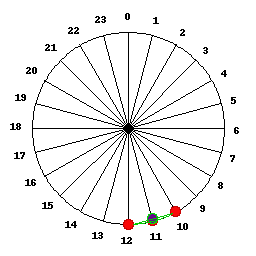

In [456]:
draw_circle(10,11,12)

### total_seconds

In [457]:
train_df['total_seconds(float)'] = (train_df['Dates_hour'] * 3600 + train_df['Dates_minute'] * 60) / 86400

train_df[['Dates','total_seconds(float)']].head()

,Dates,total_seconds(float)
0,2015-05-13 23:53:00,0.995139
1,2015-05-13 23:53:00,0.995139
2,2015-05-13 23:33:00,0.981250
3,2015-05-13 23:30:00,0.979167
4,2015-05-13 23:30:00,0.979167


In [458]:
def getx(hour):
    x = math.sin((180 - hour * 15)/180 * 3.141)
    return x

def gety(hour):    
    y = math.cos((180 - hour * 15)/180 * 3.141)
    return y

In [459]:
train_df['time_x'] = train_df['total_seconds(float)'].apply(getx)
train_df['time_y'] = train_df['total_seconds(float)'].apply(gety)

train_df[['time_x','time_y']].head()

,time_x,time_y
0,0.258115,-0.966114
1,0.258115,-0.966114
2,0.254601,-0.967046
3,0.254073,-0.967185
4,0.254073,-0.967185


In [460]:
test_df['total_seconds(float)'] = (test_df['Dates_hour'] * 3600 + test_df['Dates_minute'] * 60) / 86400

test_df[['Dates','total_seconds(float)']].head()

,Dates,total_seconds(float)
0,2015-05-10 23:59:00,0.999306
1,2015-05-10 23:51:00,0.993750
2,2015-05-10 23:50:00,0.993056
3,2015-05-10 23:45:00,0.989583
4,2015-05-10 23:45:00,0.989583


In [461]:
test_df['time_x'] = test_df['total_seconds(float)'].apply(getx)
test_df['time_y'] = test_df['total_seconds(float)'].apply(gety)

test_df[['time_x','time_y']].head()

,time_x,time_y
0,0.259168,-0.965832
1,0.257763,-0.966208
2,0.257588,-0.966255
3,0.256710,-0.966489
4,0.256710,-0.966489


# Train

In [229]:
train_df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Dates_year', 'Dates_month',
       'Dates_day', 'Dates_hour', 'Dates_minute', 'Dates_second',
       'minute(clean)', 'Address(clean)', 'division_address', 'AV',
       'Crossroad', 'Others', 'ST', 'BAYVIEW', 'CENTRAL', 'INGLESIDE',
       'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL',
       'TENDERLOIN', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'division_weekend', 'weekday', 'weekend'],
      dtype='object')

In [462]:
feature_name = ['X', 'Y', 
                'Dates_year', 'Dates_month', 'Dates_day', 'Dates_hour','minute(clean)',
                'total_seconds(float)',
                'Crossroad','ST', 'AV', 'Others',
                'Friday', 'Monday', 'Saturday', 'Sunday','Thursday', 'Tuesday', 'Wednesday',
                'weekend',
                'BAYVIEW', 'CENTRAL', 'INGLESIDE',
                'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']

In [463]:
X_train = train_df[feature_name]

print(X_train.shape)
X_train.head()

(878049, 30)


,X,Y,Dates_year,Dates_month,Dates_day,Dates_hour,minute(clean),total_seconds(float),Crossroad,ST,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.425892,37.774599,2015,5,13,23,45,0.995139,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,2015,5,13,23,45,0.995139,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,2015,5,13,23,45,0.981250,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,2015,5,13,23,30,0.979167,0,1,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,2015,5,13,23,30,0.979167,0,1,...,0,0,0,0,0,1,0,0,0,0


In [464]:
labelname = 'Category'

labelname

'Category'

In [465]:
y_train = train_df[labelname]

print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [466]:
X_test = test_df[feature_name]

print(X_test.shape)
X_test.head()

(884262, 30)


,X,Y,Dates_year,Dates_month,Dates_day,Dates_hour,minute(clean),total_seconds(float),Crossroad,ST,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.399588,37.735051,2015,5,10,23,45,0.999306,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,2015,5,10,23,45,0.993750,1,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,2015,5,10,23,45,0.993056,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,2015,5,10,23,45,0.989583,0,1,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,2015,5,10,23,45,0.989583,0,1,...,0,0,1,0,0,0,0,0,0,0


In [467]:
# CSR Matrix를 하나로 합치는 hstack 함수를 가져옵니다.
from scipy.sparse import hstack

# 원래 train 데이터의 feature와, One Hot Encoding한 주소 값을 하나로 합칩니다.
X_train = hstack([X_train.astype('float'), train_df_address])

# 이를 다시 CSR Matrix로 변환합니다.
X_train = csr_matrix(X_train)

# train 데이터의 feature를 출력합니다.
X_train

<878049x1750 sparse matrix of type '<class 'numpy.float64'>'
	with 10466290 stored elements in Compressed Sparse Row format>

In [468]:
X_test = hstack([X_test.astype('float'), test_df_address])

# 이를 다시 CSR Matrix로 변환합니다.
X_test = csr_matrix(X_test)

# test 데이터의 feature를 출력합니다.
X_test

<884262x1750 sparse matrix of type '<class 'numpy.float64'>'
	with 10536819 stored elements in Compressed Sparse Row format>

In [469]:
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state = 37)

In [470]:
model = LGBMClassifier(n_estimators = 100,
                           learning_rate = 0.01,
                           num_leaves = 200,
                           max_bin = 400,
                           min_child_samples = 350,
                           subsample = 0.65,
                           subsample_freq = 1,
                           colsample_bytree = 0.735,
                           class_type = 'balanced',
                           random_state = 37)

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.735, importance_type='split',
               learning_rate=0.01, max_bin=400, max_depth=-1,
               min_child_samples=350, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.65, subsample_for_bin=200000,
               subsample_freq=1)

In [471]:
model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = 20)

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.735, importance_type='split',
               learning_rate=0.01, max_bin=400, max_depth=-1,
               min_child_samples=350, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.65, subsample_for_bin=200000,
               subsample_freq=1)

In [472]:
y_predict_test_kf = model.predict_proba(X_test_kf)

y_predict_test_kf

array([[0.00185034, 0.08758149, 0.00034734, ..., 0.03890791, 0.05161331,
        0.0095309 ],
       [0.00146186, 0.08047097, 0.00050371, ..., 0.08523725, 0.03314939,
        0.0072097 ],
       [0.00133293, 0.07840337, 0.00035547, ..., 0.04889126, 0.04633743,
        0.00968782],
       ...,
       [0.00233527, 0.07168718, 0.00031379, ..., 0.08575632, 0.03686608,
        0.00742023],
       [0.00264189, 0.10200938, 0.00036612, ..., 0.06486472, 0.05515058,
        0.01128224],
       [0.00221261, 0.13055927, 0.00033441, ..., 0.04692108, 0.05595331,
        0.01011761]])

In [473]:
from sklearn.metrics import log_loss

# log loss를 계산합니다. 정답(y, y_test_kf)과 예측값의 확률(p, y_predict_test_kf)을 데이터로 집어넣으면
# log lsos의 계산 결과가 나옵니다. 이를 score라는 변수에 할당합니다.
score = log_loss(y_test_kf, y_predict_test_kf)

# score 변수에 할당한 점수를 출력합니다.
print(f"Score = {score:.5f}")

Score = 2.42778


## Hyperparameter tunning

### coarse search

In [356]:
# 수학 연산을 편하게 해주는 numpy 패키지를 가져옵니다.
import numpy as np

# lightgbm 패키지에서 LGBMClassifier를 가져옵니다.
from lightgbm import LGBMClassifier

# hold-out validation용으로 쓰이는 train_test_split를 가져옵니다.
from sklearn.model_selection import train_test_split

# 경진대회에서 쓰이는 측정공식인 Log Loss를 가져옵니다.
from sklearn.metrics import log_loss

# train 데이터를 hold-out validation용으로 나눕니다.
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state = 37)

# 트리의 갯수를 지정합니다.
n_estimators = 100

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_loop = 100

# early stopping을 할 횟수입니다.
early_stopping_rounds = 20

# coarse_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복합니다.
for loop in range(num_loop):
    # 이론 상으로 존재하는 모든 하이퍼패러미터 범위를 찾습니다.
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    # 이를 LGBMClassifier으로 만듭니다.
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # 모델을 학습합니다. 여기에서 early-stopping을 사용합니다.
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)

    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장합니다.
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (Log Loss는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

# coarse_hyperparameters_list의 상위 5개를 출력합니다.
coarse_hyperparameters_list.head()

 0 best iteration = 100 Score = 2.54289
 1 best iteration = 100 Score = 2.66799
 2 best iteration = 100 Score = 2.67633
 3 best iteration = 100 Score = 2.67635
 4 best iteration = 100 Score = 2.67635
 5 best iteration = 100 Score = 2.67619
 6 best iteration = 91 Score = 2.27772
 7 best iteration = 100 Score = 2.31196
 8 best iteration = 1 Score = 3.03626
 9 best iteration = 19 Score = 2.37709
10 best iteration = 89 Score = 2.25996
11 best iteration = 100 Score = 2.67635
12 best iteration = 100 Score = 2.35661
13 best iteration = 100 Score = 2.67634
14 best iteration = 100 Score = 2.67635
15 best iteration = 100 Score = 2.67635
16 best iteration = 100 Score = 2.67426
17 best iteration = 100 Score = 2.67635
18 best iteration = 100 Score = 2.67635
19 best iteration = 100 Score = 2.67629
20 best iteration = 100 Score = 2.67604
21 best iteration = 100 Score = 2.67477
22 best iteration = 100 Score = 2.67311
23 best iteration = 100 Score = 2.67635
24 best iteration = 1 Score = 17.38128
25 bes

,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
10,10,89,0.168724,82,454,328,0.815619,1,0.743870,balanced,37,2.259958
6,6,91,0.100657,58,384,355,0.388473,1,0.649672,balanced,37,2.277721
60,60,100,0.036432,78,237,336,0.740343,1,0.812384,balanced,37,2.304314
65,65,100,0.027895,177,331,279,0.640166,1,0.864211,balanced,37,2.304828
7,7,100,0.046828,104,420,343,0.437409,1,0.358630,balanced,37,2.311959


In [364]:
10 ** -0.77

0.16982436524617442

### Finer search

In [365]:
# 수학 연산을 편하게 해주는 numpy 패키지를 가져옵니다.
import numpy as np

# lightgbm 패키지에서 LGBMClassifier를 가져옵니다.
from lightgbm import LGBMClassifier

# hold-out validation용으로 쓰이는 train_test_split를 가져옵니다.
from sklearn.model_selection import train_test_split

# 경진대회에서 쓰이는 측정공식인 Log Loss를 가져옵니다.
from sklearn.metrics import log_loss

# train 데이터를 hold-out validation용으로 나눕니다.
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.2, random_state = 37)

# 트리의 갯수를 지정합니다.
n_estimators = 100

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_loop = 11

# early stopping을 할 횟수입니다.
early_stopping_rounds = 20

# finer_hyperparameters_list 탐색 결과를 리스트로 저장합니다.
finer_hyperparameters_list = []

# num_loop 횟수만큼 랜덤 서치를 반복합니다.
for loop in range(num_loop):
    # Coarse Search를 통해 범위를 좁힌 하이퍼패러미터를 찾습니다.
    learning_rate = 10 ** np.random.uniform(low = -1.0, high = -0.77)
    num_leaves = np.random.randint(58, 82)
    max_bin = np.random.randint(384, 454)
    min_child_samples = np.random.randint(328, 355) 
    subsample = np.random.uniform(low = 0.388473, high = 0.815619)
    colsample_bytree = np.random.uniform(low = 0.649672, high = 0.743870)
    
    # 이를 LGBMClassifier으로 만듭니다.
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    # 모델을 학습합니다. 마찬가지로 early-stopping을 사용합니다.
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)
    
    # 가장 좋은 점수와 이에 해당하는 n_estimators를 저장합니다.
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    finer_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
# finer_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

# 변환한 finer_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (Log Loss는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

# finer_hyperparameters_list의 상위 5개를 출력합니다.
finer_hyperparameters_list.head()

 0 best iteration = 100 Score = 2.26123
 1 best iteration = 75 Score = 2.29469
 2 best iteration = 97 Score = 2.26526
 3 best iteration = 100 Score = 2.27106
 4 best iteration = 82 Score = 2.27741
 5 best iteration = 94 Score = 2.28964
 6 best iteration = 100 Score = 2.25972
 7 best iteration = 100 Score = 2.25561
 8 best iteration = 96 Score = 2.28407
 9 best iteration = 16 Score = 2.48745
10 best iteration = 18 Score = 2.36788


,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
7,7,100,0.134388,70,443,333,0.656559,1,0.734899,balanced,37,2.255609
6,6,100,0.115591,79,430,342,0.569540,1,0.705372,balanced,37,2.259722
0,0,100,0.136949,66,386,352,0.558764,1,0.741219,balanced,37,2.261227
2,2,97,0.129606,79,415,347,0.533299,1,0.665323,balanced,37,2.265261
3,3,100,0.135185,64,441,343,0.409835,1,0.740804,balanced,37,2.271061


# Predict

In [366]:
# finer search로 찾은 가장 좋은 하이퍼패러미터만을 가져옵니다.
best_hyperparameters = finer_hyperparameters_list.iloc[0]

# 이를 best_hyperparameters라는 값에 저장합니다.
best_hyperparameters

loop                        7
n_estimators              100
learning_rate        0.134388
num_leaves                 70
max_bin                   443
min_child_samples         333
subsample            0.656559
subsample_freq              1
colsample_bytree     0.734899
class_type           balanced
random_state               37
score                 2.25561
Name: 7, dtype: object

In [367]:
from lightgbm import LGBMClassifier

# 가장 좋은 하이퍼패러미터로 LGBMClassifier를 만듭니다.
model = LGBMClassifier(n_estimators = best_hyperparameters['n_estimators'],
                       learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.7348989596623037, importance_type='split',
               learning_rate=0.134387965250015, max_bin=443, max_depth=-1,
               min_child_samples=333, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=70,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.6565589028474681,
               subsample_for_bin=200000, subsample_freq=1)

In [368]:
%time model.fit(X_train, y_train)

Wall time: 4min 20s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.7348989596623037, importance_type='split',
               learning_rate=0.134387965250015, max_bin=443, max_depth=-1,
               min_child_samples=333, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=70,
               objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.6565589028474681,
               subsample_for_bin=200000, subsample_freq=1)

In [369]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# 이 결과를 prediction_list라는 이름의 변수에 할당합니다.
prediction_list = model.predict_proba(X_test)

# prediction_list라는 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(prediction_list.shape)

# prediction_list를 화면에 출력합니다.
prediction_list

(884262, 39)


array([[2.22386145e-03, 7.75650558e-02, 9.77300250e-05, ...,
        3.03462038e-01, 2.40687330e-02, 1.08792337e-02],
       [9.25837067e-04, 4.50796400e-02, 3.67089671e-06, ...,
        1.90216205e-02, 8.10077402e-02, 3.49955805e-02],
       [9.38588507e-03, 1.01007123e-01, 1.19929408e-05, ...,
        4.64069361e-02, 3.24271299e-02, 6.89090704e-03],
       ...,
       [8.40538750e-04, 1.03479893e-01, 9.97528700e-04, ...,
        3.61543565e-02, 1.27029687e-02, 2.61165967e-03],
       [8.92499055e-04, 7.78070262e-02, 2.00125247e-03, ...,
        6.92494682e-02, 1.50691873e-02, 6.84734260e-03],
       [7.68020094e-04, 5.60764717e-02, 2.95969875e-03, ...,
        2.92272017e-02, 1.24743527e-02, 3.49852828e-03]])

# Submit

In [370]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 sample_submission 이라는 이름의 변수에 할당합니다.
sample_submission = pd.read_csv("sampleSubmission.csv", index_col = "Id")

# 예측값(prediction_list), 제출 포멧(sample_submission), 그리고 예측모델의 결과(model)를 활용해
# 제출본(submission)을 만듭니다. prediction_list를 판다스 DataFrame으로 바꾸되,
# 이 데이터프레임의 인덱스(Index)는 제출 포멧(sample_submission)으로,
# 컬럼(columns)은 예측모델(model)이 학습한 클래스를 사용합니다.
submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.002224,0.077565,0.000098,0.000044,0.040765,0.001427,0.005449,0.017728,0.001859,0.002121,...,0.000023,0.008076,0.000139,0.058096,0.0,0.005512,0.068343,0.303462,0.024069,0.010879
1,0.000926,0.045080,0.000004,0.000008,0.001761,0.001715,0.020608,0.050759,0.002343,0.000042,...,0.000007,0.007483,0.000079,0.034190,0.0,0.000515,0.017332,0.019022,0.081008,0.034996
2,0.009386,0.101007,0.000012,0.000060,0.091954,0.001263,0.001868,0.017656,0.007709,0.000565,...,0.000002,0.007981,0.000129,0.039254,0.0,0.010684,0.081390,0.046407,0.032427,0.006891
3,0.001860,0.194925,0.000015,0.000132,0.026678,0.003681,0.003325,0.028732,0.022733,0.000131,...,0.000013,0.007295,0.000051,0.061220,0.0,0.008033,0.071439,0.030837,0.049305,0.019613
4,0.001860,0.194925,0.000015,0.000132,0.026678,0.003681,0.003325,0.028732,0.022733,0.000131,...,0.000013,0.007295,0.000051,0.061220,0.0,0.008033,0.071439,0.030837,0.049305,0.019613


In [371]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("sf-crime-2.25561.csv")